In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.metrics import accuracy_score
dataframe = pd.read_csv('Hipertension_Arterial_Mexico_balanced.csv')


In [29]:
dataframe.head(10)

,masa_corporal,tension_arterial,peso,actividad_total,medida_cintura,estatura,edad,valor_insulina,sueno_horas,valor_colesterol_ldl,riesgo_hipertension
0,26.363730,130.0,70.45,350.0,84.0,160.5,24.0,4.0,4.0,86.0,1.0
1,34.073848,90.0,95.40,320.0,115.7,164.4,46.0,4.0,5.0,86.0,0.0
2,26.981855,135.0,82.70,1700.0,100.6,172.3,26.0,4.0,1.0,86.0,1.0
3,28.685131,147.0,62.25,560.0,96.8,144.0,52.0,4.0,4.0,86.0,1.0
4,28.626415,139.0,63.95,60.0,94.5,146.2,46.0,4.0,5.0,86.0,1.0
5,33.449655,119.0,105.10,280.0,119.3,174.5,50.0,4.0,3.0,86.0,1.0
6,23.141192,99.0,60.35,720.0,88.4,158.5,54.0,4.0,4.0,86.0,0.0
7,25.810139,138.0,64.65,255.0,102.3,155.2,48.0,4.0,2.0,86.0,1.0
8,28.987388,159.0,82.10,600.0,103.5,165.4,58.0,10.0,3.0,105.0,1.0
9,31.986097,155.0,66.60,570.0,92.6,140.9,57.0,4.0,3.0,86.0,1.0


In [31]:
dataframe.describe()

,masa_corporal,tension_arterial,peso,actividad_total,medida_cintura,estatura,edad,valor_insulina,sueno_horas,valor_colesterol_ldl,riesgo_hipertension
count,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000
mean,26.838242,117.152604,70.229425,497.156357,93.822164,158.467334,41.983951,6.239429,3.157762,86.707069,0.500000
std,5.472489,18.684530,15.880155,576.541046,14.097327,9.865708,11.110927,8.712454,1.084345,14.487280,0.500075
min,15.355268,80.000000,32.050000,10.000000,58.800000,0.000000,4.000000,1.100000,1.000000,20.000000,0.000000
25%,22.685030,103.170411,58.810131,256.103147,83.600000,152.076948,33.000000,4.000000,2.042106,86.000000,0.000000
50%,26.072426,115.000000,67.938360,420.000000,92.214239,157.797577,43.000000,4.000000,3.015413,86.000000,0.500000
75%,30.142817,127.013560,78.900000,600.000000,102.124075,164.833336,51.000000,4.378606,4.000000,86.000000,1.000000
max,60.513476,200.000000,168.800000,6570.000000,189.300000,191.100000,88.000000,264.100000,5.000000,261.000000,1.000000


In [33]:
dataframe.groupby('riesgo_hipertension').size()

riesgo_hipertension
0.0    1670
1.0    1670
dtype: int64

In [35]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   masa_corporal         3340 non-null   float64
 1   tension_arterial      3340 non-null   float64
 2   peso                  3340 non-null   float64
 3   actividad_total       3340 non-null   float64
 4   medida_cintura        3340 non-null   float64
 5   estatura              3340 non-null   float64
 6   edad                  3340 non-null   float64
 7   valor_insulina        3340 non-null   float64
 8   sueno_horas           3340 non-null   float64
 9   valor_colesterol_ldl  3340 non-null   float64
 10  riesgo_hipertension   3340 non-null   float64
dtypes: float64(11)
memory usage: 287.2 KB


In [37]:
dataframe.describe()

,masa_corporal,tension_arterial,peso,actividad_total,medida_cintura,estatura,edad,valor_insulina,sueno_horas,valor_colesterol_ldl,riesgo_hipertension
count,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000
mean,26.838242,117.152604,70.229425,497.156357,93.822164,158.467334,41.983951,6.239429,3.157762,86.707069,0.500000
std,5.472489,18.684530,15.880155,576.541046,14.097327,9.865708,11.110927,8.712454,1.084345,14.487280,0.500075
min,15.355268,80.000000,32.050000,10.000000,58.800000,0.000000,4.000000,1.100000,1.000000,20.000000,0.000000
25%,22.685030,103.170411,58.810131,256.103147,83.600000,152.076948,33.000000,4.000000,2.042106,86.000000,0.000000
50%,26.072426,115.000000,67.938360,420.000000,92.214239,157.797577,43.000000,4.000000,3.015413,86.000000,0.500000
75%,30.142817,127.013560,78.900000,600.000000,102.124075,164.833336,51.000000,4.378606,4.000000,86.000000,1.000000
max,60.513476,200.000000,168.800000,6570.000000,189.300000,191.100000,88.000000,264.100000,5.000000,261.000000,1.000000


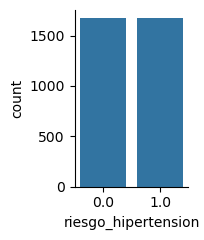

In [39]:
import seaborn as sb
sb.catplot(x = 'riesgo_hipertension',data=dataframe,kind="count", height=2.5, aspect=.8)

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

balanced_data = pd.read_csv('Hipertension_Arterial_Mexico_balanced.csv')

y = balanced_data['riesgo_hipertension']
x = balanced_data.drop('riesgo_hipertension', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=150, max_depth=20, random_state=42)
model.fit(x_train, y_train)

predicciones = model.predict(x_test)
clasificadores = {0: "Sin riesgo", 1: "Con riesgo"}
target_names = list(clasificadores.values())
print("Reporte de clasificación:")
print(classification_report(y_test, predicciones, target_names=target_names))


Reporte de clasificación:
              precision    recall  f1-score   support

  Sin riesgo       0.99      0.98      0.99       494
  Con riesgo       0.98      0.99      0.99       508

    accuracy                           0.99      1002
   macro avg       0.99      0.99      0.99      1002
weighted avg       0.99      0.99      0.99      1002



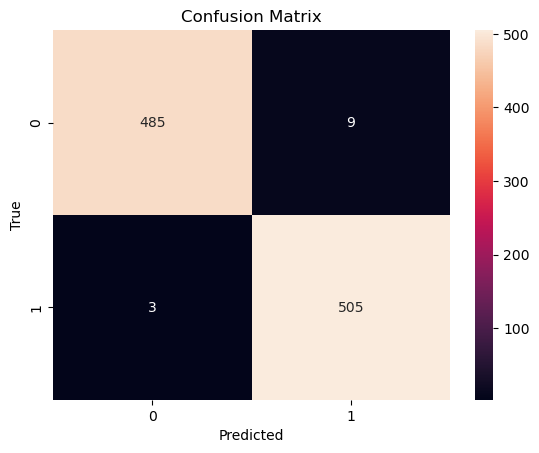

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt="d", xticklabels=clasificadores, yticklabels=clasificadores)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show();

In [43]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [47]:
from flask import Flask, jsonify, request
from threading import Thread
import time
app = Flask(__name__)

try:
    with open('model.pkl', 'rb') as f:
        model = pickle.load(f)
    print("Modelo cargado correctamente")
except Exception as e:
    print("Error al cargar el modelo:", str(e))
    modelo = None

@app.route('/predict', methods=['POST'])
def predict():
    try:
        req_json = request.get_json()
        print("Datos recibidos en la API:", req_json)
        input_data = pd.DataFrame(req_json)
        print("DataFrame creado:", input_data.to_dict())
    except Exception as e:
        print("Error al procesar JSON:", str(e))
        return jsonify({'error': str(e)}), 400

    if input_data.empty:
        print("Error: DataFrame vacío")
        return jsonify({'error': 'No data provided'}), 400

    expected_columns = ['masa_corporal', 'tension_arterial', 'peso', 'actividad_total','medida_cintura', 'estatura', 'edad', 'valor_insulina', 'sueno_horas', 'valor_colesterol_ldl']
    if not all(col in input_data.columns for col in expected_columns):
        print("Error: Columnas faltantes", input_data.columns.tolist())
        return jsonify({'error': 'Missing required columns'}), 400
    
    try:
        predictions = model.predict(input_data)
        predictions = predictions.astype(int)
        predictions = [clasificadores[pred] for pred in predictions]
        probabilities = model.predict_proba(input_data).tolist()
        print("Predicciones realizadas:", predictions)
    except Exception as e:
        print("Error al hacer predicciones:", str(e))
        return jsonify({'error': 'Prediction failed'}), 500

    response = jsonify({
        'predictions': predictions,
        'probabilities': probabilities
    })
    response.status_code = 200
    print("Respuesta enviada:", response.get_json())
    return response

def run_flask():
    app.run(port=8001, use_reloader=False)

if __name__ == '__main__':
    Thread(target=run_flask).start()
    time.sleep(3)

Modelo cargado correctamente
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8001
Press CTRL+C to quit


In [48]:
test_data = pd.DataFrame({
    'masa_corporal': [31],
    'tension_arterial': [107],
    'peso': [74.55],
    'actividad_total': [120],
    'medida_cintura': [88],
    'estatura': [147.3],
    'edad': [41],
    'valor_insulina': [4],
    'sueno_horas': [4],
    'valor_colesterol_ldl': [86]
})

data_json = test_data.to_json(orient='records')

print("Datos enviados en el POST:")
print(data_json)

headers = {'Content-Type': 'application/json', 'Accept': 'application/json'}

try:
    print("Enviando solicitud POST a http://localhost:8001/predict")
    response = requests.post('http://localhost:8001/predict', data=data_json, headers=headers)
    print('\nConsulta a la API:')
    print('Status:', response.status_code)
    print('Respuesta:', response.json())
except Exception as e:
    print(f"Error al consultar la API: {e}")

Datos enviados en el POST:
[{"masa_corporal":31,"tension_arterial":107,"peso":74.55,"actividad_total":120,"medida_cintura":88,"estatura":147.3,"edad":41,"valor_insulina":4,"sueno_horas":4,"valor_colesterol_ldl":86}]
Enviando solicitud POST a http://localhost:8001/predict


127.0.0.1 - - [13/May/2025 10:56:39] "POST /predict HTTP/1.1" 200 -


Datos recibidos en la API: [{'masa_corporal': 31, 'tension_arterial': 107, 'peso': 74.55, 'actividad_total': 120, 'medida_cintura': 88, 'estatura': 147.3, 'edad': 41, 'valor_insulina': 4, 'sueno_horas': 4, 'valor_colesterol_ldl': 86}]
DataFrame creado: {'masa_corporal': {0: 31}, 'tension_arterial': {0: 107}, 'peso': {0: 74.55}, 'actividad_total': {0: 120}, 'medida_cintura': {0: 88}, 'estatura': {0: 147.3}, 'edad': {0: 41}, 'valor_insulina': {0: 4}, 'sueno_horas': {0: 4}, 'valor_colesterol_ldl': {0: 86}}
Predicciones realizadas: ['Con riesgo']
Respuesta enviada: {'predictions': ['Con riesgo'], 'probabilities': [[0.02666666666666667, 0.9733333333333334]]}

Consulta a la API:
Status: 200
Respuesta: {'predictions': ['Con riesgo'], 'probabilities': [[0.02666666666666667, 0.9733333333333334]]}
